<a href="https://colab.research.google.com/github/afiqnabiha/klasifikasi_diabetes_knn/blob/main/diabetes_klasifikasi_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#UNtuk data frame
import pandas as pd  # pandas untuk manipulasi dan analisis data
import numpy as np  # numpy untuk operasi numerik

#Untuk VIsualisasi Data
import seaborn as sns  # seaborn untuk visualisasi data
import matplotlib.pyplot as plt  # matplotlib untuk visualisasi grafik

#Preprocessing Data
from imblearn.over_sampling import SMOTE  # imblearn untuk penanganan ketidakseimbangan kelas (Oversampling)
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler # imblearn untuk penanganan ketidakseimbangan kelas (Undersampling)

#Untuk Modeling
from sklearn.model_selection import train_test_split  # sklearn untuk pemodelan dan evaluasi model
from sklearn.naive_bayes import GaussianNB  # Mengimport algoritma Naive Bayes
from sklearn.neighbors import KNeighborsClassifier  # Mengimport algoritma KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

#evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # sklearn untuk evaluasi model

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes_prediction_dataset.csv",index_col = [0]) #membaca file di laptop

In [ ]:
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,,
Female,80.0,0,1,never,25.19,6.6,140,0
Female,54.0,0,0,No Info,27.32,6.6,80,0
Male,28.0,0,0,never,27.32,5.7,158,0
Female,36.0,0,0,current,23.45,5.0,155,0
Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.isna().sum()#missingvalue

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df["smoking_history"]=label_encoder.fit_transform(df["smoking_history"])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,4,25.19,6.6,140,0
1,Female,54.0,0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,4,27.32,5.7,158,0
3,Female,36.0,0,0,1,23.45,5.0,155,0
4,Male,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
df["gender"]=label_encoder.fit_transform(df["gender"])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [ ]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9525
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.87      0.52      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.91      0.76      0.81     20000
weighted avg       0.95      0.95      0.95     20000



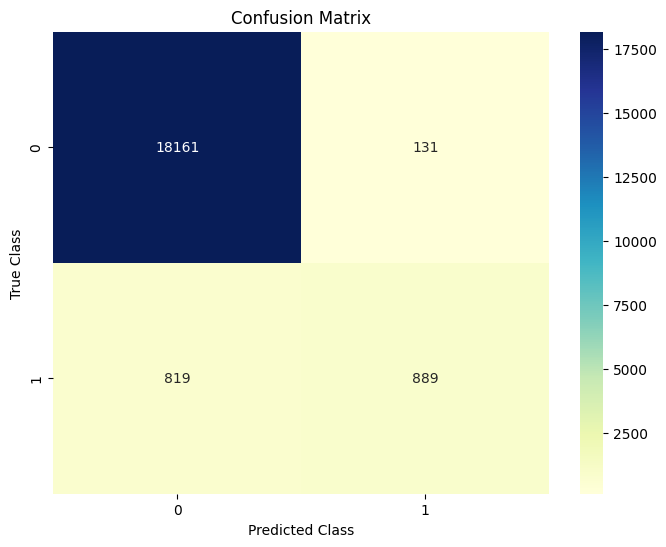

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)


knn_classifier.fit(X_train, y_train)
knn_classifier2 = knn_classifier.predict(X_test)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

tidak seimbang
oversampling

In [ ]:
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [ ]:
smote = SMOTE(random_state=42) #Memangil SMOTE dengan random state 42  menghasilkan hasil yang dapat direproduksi secara konsisten.
X_resampled, y_resampled = smote.fit_resample(X, y) # menyimpan hasil over samping tersebut pada x y resampled

X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Accuracy: 0.9365846994535519
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93     18293
           1       0.90      0.98      0.94     18307

    accuracy                           0.94     36600
   macro avg       0.94      0.94      0.94     36600
weighted avg       0.94      0.94      0.94     36600



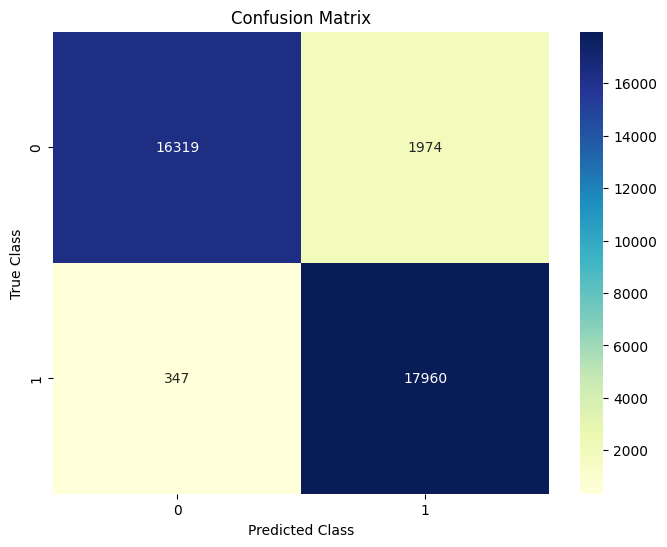

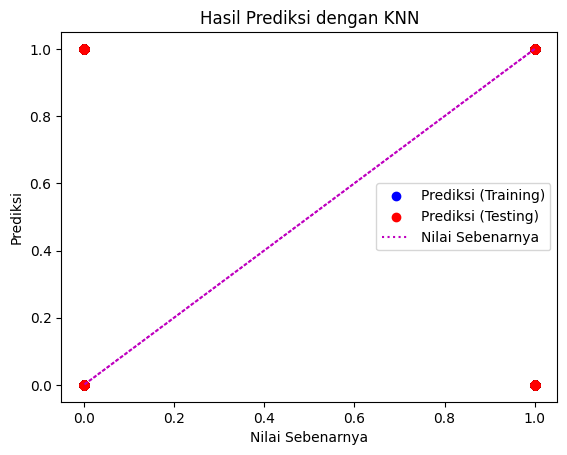

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data yang telah dilakukan oversampling
knn_classifier.fit(X_train_oversampled, y_train_oversampled)

# Melakukan prediksi pada data oversampled
y_pred_oversampled = knn_classifier.predict(X_test_oversampled)

# Menghitung akurasi, laporan klasifikasi, dan matriks kebingungan
accuracy_oversampled = accuracy_score(y_test_oversampled, y_pred_oversampled)
report_oversampled = classification_report(y_test_oversampled, y_pred_oversampled)
confusion_mat_oversampled = confusion_matrix(y_test_oversampled, y_pred_oversampled)

# Menampilkan akurasi dan laporan klasifikasi
print("Accuracy:", accuracy_oversampled)
print("Classification Report:\n", report_oversampled)

# Menampilkan matriks kebingungan menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_oversampled, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Contoh visualisasi grafik garis
y_train_pred = knn_classifier.predict(X_train_oversampled)
y_test_pred = knn_classifier.predict(X_test_oversampled)

# Buat visualisasi hasil prediksi
plt.scatter(y_train_oversampled, y_train_pred, color='b', label='Prediksi (Training)')
plt.scatter(y_test_oversampled, y_test_pred, color='r', label='Prediksi (Testing)')
plt.plot(y_test_oversampled, y_test_oversampled, color='m', linestyle='dotted', label='Nilai Sebenarnya')

plt.title('Hasil Prediksi dengan KNN')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.legend()
plt.show()